Table for the number of units sold each month per item with their corresponding price, brand, and grand total. 

                                          Brand  Price  2022/01  2022/02  2022/03  2022/04  2022/05  2022/06
HealthyKid 3+,Gummy Vitamins      HealthyKid 3+   1500    14534    15058    15232    14701    14926    14879
HealthyKid 3+,Yummy Vegetables    HealthyKid 3+    500    15039    15186    14784    14902    14700    14693
HealthyKid 3+,Nutrional Milk      HealthyKid 3+   1990    14582    14535    14633    14571    14737    14550
Exotic Extras,Kimchi and Seaweed  Exotic Extras    799    14533    14830    15014    14793    14632    15151
Exotic Extras,Beef Chicharon      Exotic Extras   1299    14622    15100    14629    14788    14973    14746
Candy City,Orange Beans              Candy City    199    14721    15199    14394    14896    14963    15130
Candy City,Gummy Worms               Candy City    150    14403    14814    15164    14924    14747    14958

--------------

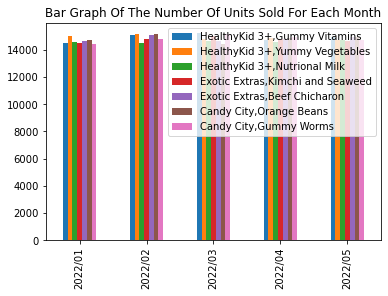

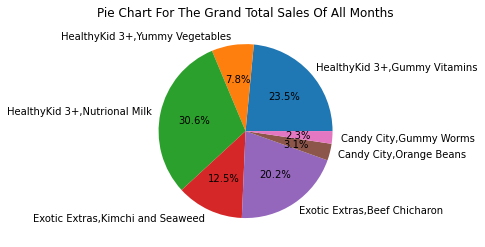

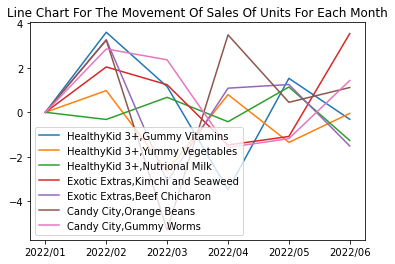

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = "{:,.2f}".format

def nameandquantity(x,y):
    index=np.char.find(x,'(',start=0,end=None)
    quantity=int(x[index+2:-1])
    productname=x[:index-1]
    if productname in monthly_transactions[y]:
        monthly_transactions[y][productname]+=quantity
    else:
        monthly_transactions[y][productname]=0
        monthly_transactions[y][productname]+=quantity
    
data = (json.load(open('transaction-data-adhoc-analysis.json')))

monthly_transactions={}
monthly_transactions["Brand"] = {'HealthyKid 3+,Gummy Vitamins':'HealthyKid 3+', 'HealthyKid 3+,Yummy Vegetables':'HealthyKid 3+', 'HealthyKid 3+,Nutrional Milk':'HealthyKid 3+', 'Exotic Extras,Kimchi and Seaweed':'Exotic Extras', 'Exotic Extras,Beef Chicharon':'Exotic Extras',  'Candy City,Orange Beans':'Candy City', 'Candy City,Gummy Worms':'Candy City'}
monthly_transactions["Price"] = {'HealthyKid 3+,Gummy Vitamins':1500, 'HealthyKid 3+,Yummy Vegetables':500, 'HealthyKid 3+,Nutrional Milk':1990, 'Exotic Extras,Kimchi and Seaweed':799, 'Exotic Extras,Beef Chicharon':1299,  'Candy City,Orange Beans':199, 'Candy City,Gummy Worms':150}
vnameandquantity=np.vectorize(nameandquantity)

for transactions in data:
    foodbought=np.array(transactions['transaction_items'].split(';'))
    monthdate=(transactions['transaction_date'][:7]) 
    if monthdate in monthly_transactions:
        vnameandquantity(foodbought,monthdate)
    else:
        monthly_transactions[monthdate]={}
        vnameandquantity(foodbought,monthdate)

df = pd.DataFrame(monthly_transactions)

print("Table for the number of units sold each month per item with their corresponding price, brand, and grand total. \n")
print(df.to_string())
print("\n-----------------------\n")
                         
print("Table for the total sales per month of each item with their corresponding price, brand, and grand total. \n")
newdf = df.copy(deep=True)
newdf[newdf.columns[2:df.shape[1]]] = newdf[newdf.columns[2:df.shape[1]]].mul(newdf["Price"], axis=0)
newdf["Grand Total"]=newdf.sum(axis=1,numeric_only=True)
print(newdf)

print("\n-----------------------\n")
print("Table for percentage change in sales from the previous month with their corresponding price, and brand. \n")
new2df = newdf.copy(deep=True)
del new2df["Grand Total"]
del new2df["Price"]
del new2df["Brand"]
new2df=new2df.T
new2df=new2df.div(new2df.shift(1)).astype(float)-1
new2df=new2df.T
new2df=(new2df.fillna(0))*100
print(new2df)
#bar graph
df[df.columns[2:df.shape[1]-1]].T.plot(kind='bar')
plt.title("Bar Graph Of The Number Of Units Sold For Each Month")
plt.show()
#pie chart
newdf[newdf.columns[-1]].T.plot(kind='pie',autopct='%1.1f%%')
plt.ylabel("")
plt.title("Pie Chart For The Grand Total Sales Of All Months")
plt.show()
#line graph
new2df.T.plot()
plt.title("Line Chart For The Movement Of Sales Of Units For Each Month")
plt.show()


Table for the number of Repeater, Engaged, Inactive, and Total Customers per month. 

                    2022/01  2022/02  2022/03  2022/04  2022/05  2022/06
Repeater Customers        0     5172     5216     5154     5110     5193
Engaged Customers      6588     5172     4126     3289     2667     2190
Inactive Customers        0     1416     1747     1909     1917     1835
Total Customers        6588     6631     6622     6556     6568     6652

-----------------------

Table for the percentage of Repeater, Engaged, and Inactive Customers in relation to the Total Customers per month. 

                    2022/01  2022/02  2022/03  2022/04  2022/05  2022/06
Repeater Customers     0.00     0.78     0.79     0.79     0.78     0.78
Engaged Customers      1.00     0.78     0.62     0.50     0.41     0.33
Inactive Customers     0.00     0.21     0.26     0.29     0.29     0.28

-----------------------

Table for the number of Returning Customers, Unique Customers, and Total Customers per 

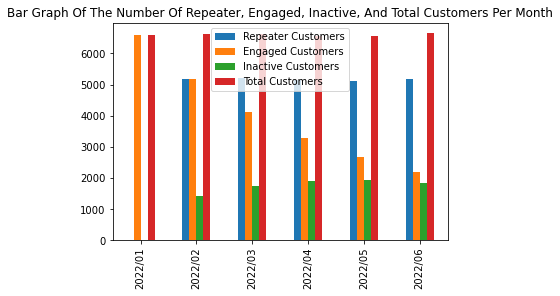

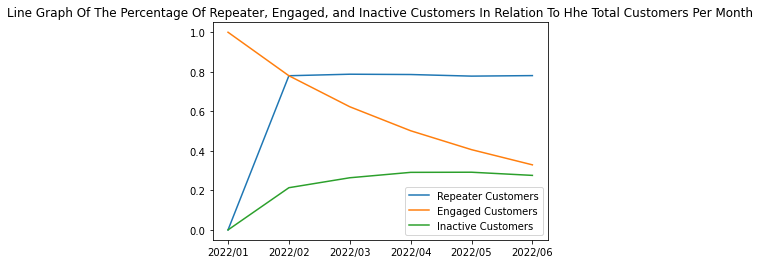

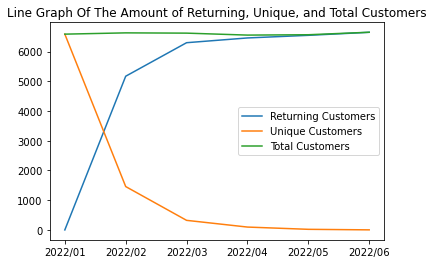

In [5]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = "{:,.2f}".format

data = (json.load(open('transaction-data-adhoc-analysis.json')))

monthly_transactions={0:set()}
repeater_customers={}
engaged_customers={}
inactive_customers={}
monthly_customers={}
runninglist_customers=set()
returning_customers={}
unique_customers={}

for transactions in data:
    customers=transactions['name']
    monthdate=int((transactions['transaction_date'][6:7]))
    if monthdate in monthly_transactions:
        monthly_transactions[monthdate].add(customers)
    else:
        monthly_transactions[monthdate]=set()
        monthly_transactions[monthdate].add(customers)

runninglist_engaged_customers=monthly_transactions[1]

for month in np.arange(1,13):
    if month!=0 and month in monthly_transactions:
        repeater_customers[month]=len(monthly_transactions[month].intersection(monthly_transactions[month-1]))
        runninglist_engaged_customers=runninglist_engaged_customers.intersection(monthly_transactions[month])
        returning_customers[month]=len(runninglist_customers.intersection(monthly_transactions[month]))
        engaged_customers[month]=len(runninglist_engaged_customers)
        runninglist_customers.update(monthly_transactions[month])
        inactive_customers[month]=len(runninglist_customers)-len(monthly_transactions[month])
        monthly_customers[month]=len(monthly_transactions[month])
        unique_customers[month]=monthly_customers[month]-returning_customers[month]

database={"Repeater Customers":repeater_customers,"Engaged Customers":engaged_customers,"Inactive Customers":inactive_customers,"Total Customers":monthly_customers}

df = pd.DataFrame(database)
df = df.T

df.rename(columns=lambda x: "2022/0"+str(x) if (x<10) else "2022/"+str(x), inplace=True)
print("Table for the number of Repeater, Engaged, Inactive, and Total Customers per month. \n")
print(df.to_string())
print("\n-----------------------\n")

newdf = df.copy(deep=True)
newdf = newdf.div(newdf.iloc[-1])
newdf = newdf.drop('Total Customers')

print("Table for the percentage of Repeater, Engaged, and Inactive Customers in relation to the Total Customers per month. \n")
print(newdf.to_string())
print("\n-----------------------\n")

newdf2 = pd.DataFrame({"Returning Customers":returning_customers,"Unique Customers":unique_customers, "Total Customers":monthly_customers})
newdf2 = newdf2.T
newdf2.rename(columns=lambda x: "2022/0"+str(x) if (x<10) else "2022/"+str(x), inplace=True)

print("Table for the number of Returning Customers, Unique Customers, and Total Customers per month.\n*Note: Returning Customers are customers who has bought before in any previous months and has bought again in the current month.\n*Note: Unique Customers are customers who has only bought at the current month.\n")
print(newdf2.to_string())

#bar graph
df.T.plot(kind='bar')
plt.title("Bar Graph Of The Number Of Repeater, Engaged, Inactive, And Total Customers Per Month")
plt.show()
#line graph
newdf.T.plot(kind='line')
plt.title("Line Graph Of The Percentage Of Repeater, Engaged, and Inactive Customers In Relation To Hhe Total Customers Per Month")
plt.show()
#line graph
newdf2.T.plot(kind='line')
plt.title("Line Graph Of The Amount of Returning, Unique, and Total Customers")
plt.show()
#print(monthly_transactions)